<a href="https://colab.research.google.com/github/praise-phiri/Class-Assignments/blob/main/Part_two/creating_a_custom_computer_vision_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CREATING A CUSTOM COMPUTER VISION DATASET
In this part of the assignment, we are going to create a dataset from scratch by grabbing the images from a website of our choice, preprocess the images and thus feature engineering,anotate the images using an annotation tool, in our case RoboFlow, and then we will structure the dataset in folders ready for machine learning models.

### STEP 1: Downloading the images from the web
In this case we have used two webscraping technologies:
- `requests`
- `beautifulsoup`

We have also used the `os` library in order to create a folder and store the download images. We have used two functions,
- one that accepts a url in order to extract image urls from the web as a list.
- one that accepts the folder name and the list of urls from the previous function to now download and store the images as below:




In [ ]:
import os
import requests
from bs4 import BeautifulSoup

def get_image_links(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    img_tags = soup.find_all("img")
    image_links = []
    for img in img_tags:
        if "src" in img.attrs:
            image_links.append(img["src"])
    return image_links

def download_images(image_links, folder_name):
    os.makedirs(folder_name, exist_ok=True)
    for i, link in enumerate(image_links):
        try:
            response = requests.get(link)
            with open(os.path.join(folder_name, f"{folder_name}_{i+1}.jpg"), "wb") as f:
                f.write(response.content)
        except Exception as e:
            print(f"Error downloading image from {link}: {e}")

def main():
    url = input("Enter URL: ")
    num_images = int(input("Enter number of images to download: "))
    folder_name = input("Enter folder name: ")

    image_links = get_image_links(url)[:num_images]
    download_images(image_links, folder_name)
    print(f"{min(num_images, len(image_links))} images downloaded and saved in '{folder_name}' folder.")

if __name__ == "__main__":
    main()


Enter URL: https://unsplash.com/s/photos/ducks
Enter number of images to download: 50
Enter folder name: sample_ducks
Error downloading image from : No connection adapters were found for ''
Error downloading image from : No connection adapters were found for ''
Error downloading image from : No connection adapters were found for ''
Error downloading image from : No connection adapters were found for ''
Error downloading image from : No connection adapters were found for ''
Error downloading image from : No connection adapters were found for ''
Error downloading image from : No connection adapters were found for ''
Error downloading image from : No connection adapters were found for ''
Error downloading image from : No connection adapters were found for ''
Error downloading image from : No connection adapters were found for ''
50 images downloaded and saved in 'sample_ducks' folder.


### 2. Preprocessing the images downloaded in the user created folder

In this step we will then use opencv to do some feature engineering and preprocessing such that we will resize the images

In [ ]:
import os
import cv2

def resize_images(folder_path):
    # Create a new folder for resized images
    resized_folder_path = os.path.join(folder_path, "resized_images")
    os.makedirs(resized_folder_path, exist_ok=True)

    # Get a list of all image files in the folder
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    # Resize each image and save it to the resized folder
    for image_file in image_files:
        try:
            # Read the image
            image_path = os.path.join(folder_path, image_file)
            img = cv2.imread(image_path)

            # Resize the image (e.g., to 128x128)
            resized_img = cv2.resize(img, (228, 228))

            # Save the resized image to the resized folder
            resized_image_path = os.path.join(resized_folder_path, image_file)
            cv2.imwrite(resized_image_path, resized_img)
        except Exception as e:
            print(f"Error processing {image_file}: {e}")

def main():
    folder_path = input("Enter the folder path containing images: ")
    resize_images(folder_path)
    print("Images resized and saved to 'resized_images' folder.")

if __name__ == "__main__":
    main()


### 3. Annotatting the images
In this step, we will annotate the resized images using `RoboFlow` annotation tool. After annotation, RoboFlow had a wide variety of options for your annotated images so as to apply featutre engineering like grayscale and augmentation

RoboFlow makes it easier to preprocess the images and augment them as well as shown below
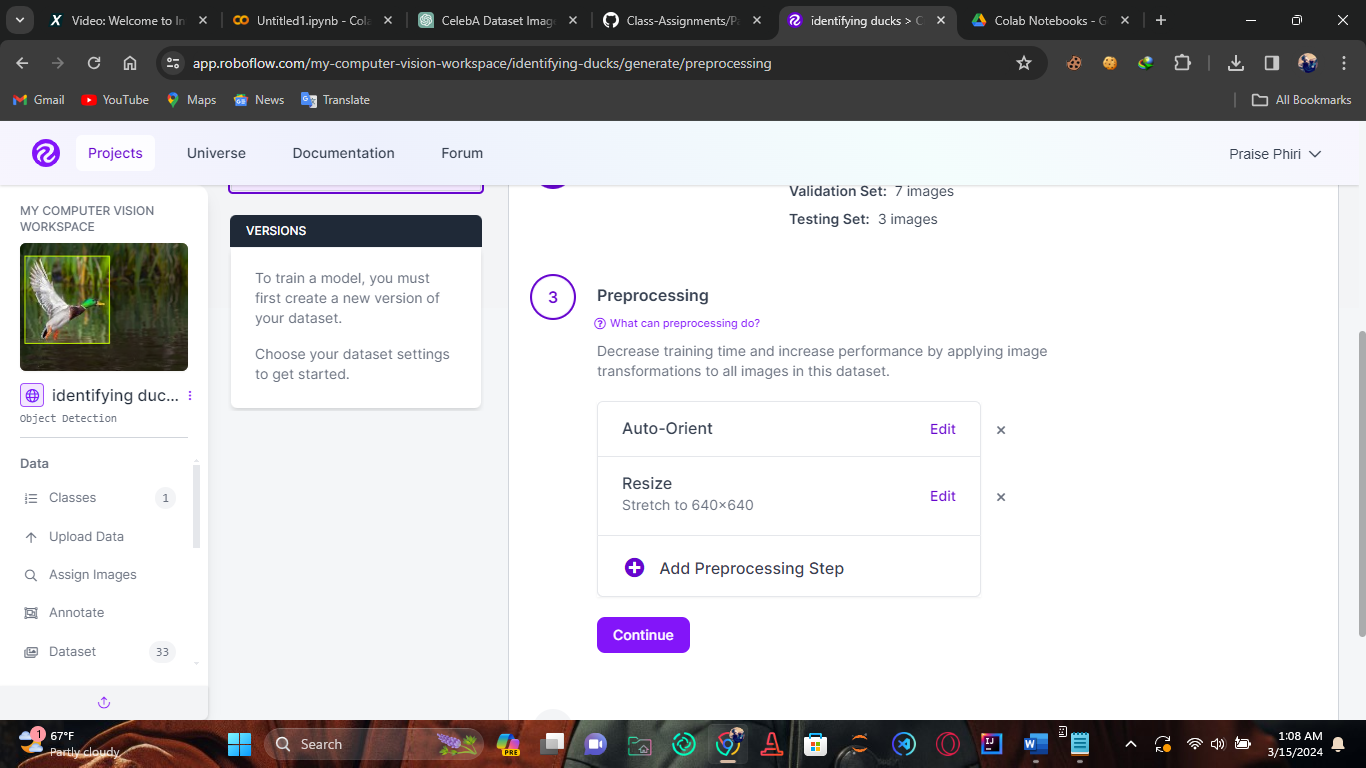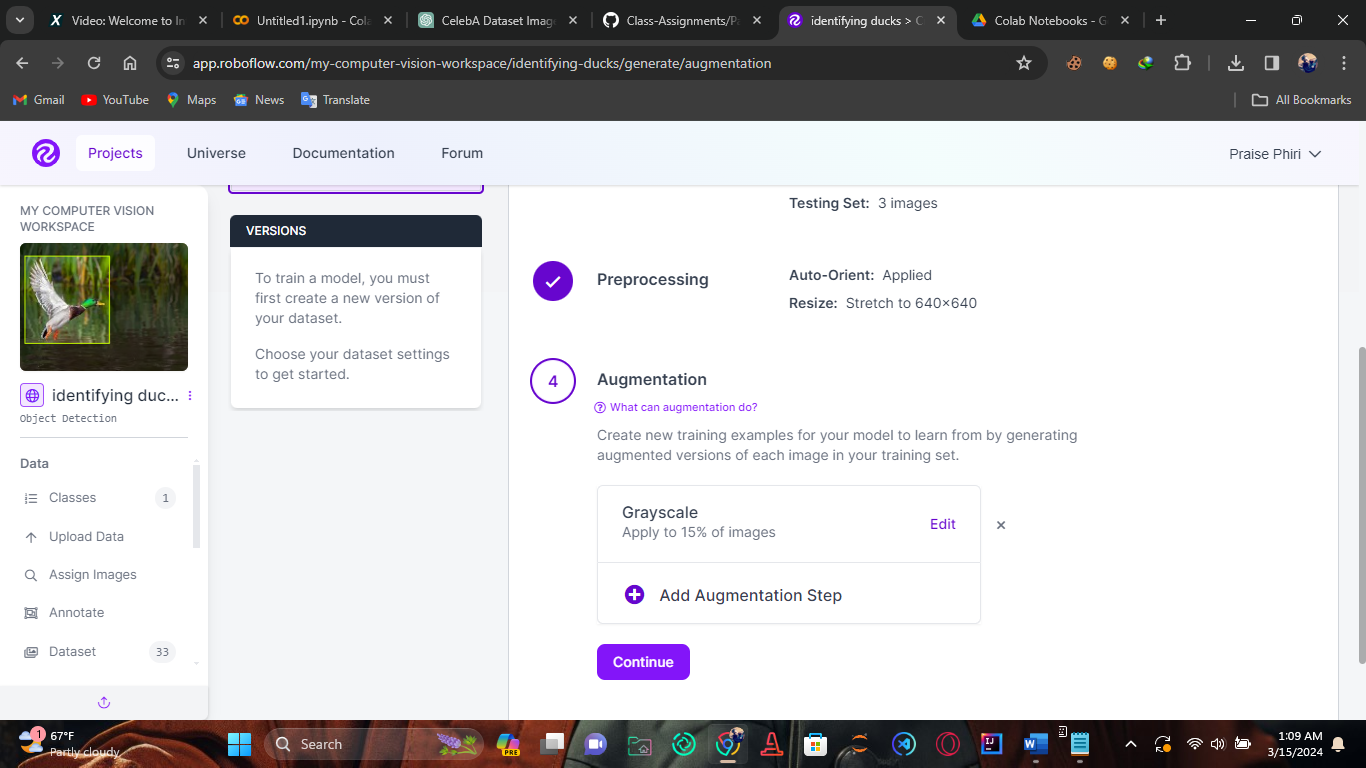

### 4. Exporting the dataset
With our given dataset, we will assume that we are going to use a YOLOV8 model that will learn using the data given. In this case, a google link of the data arranged is attached here: [Dataset](https://drive.google.com/drive/folders/1m9WoKeoXTqa0LbQ1xkuSm6H_FNuaG1IG?usp=sharing)

## ##################################
In this part, we have created a dataset from scratch, preprocess annotate and export the dataset in the suitable format for a machine learning model.

## PROBLEMS MET DURING THE IMPLEMENTATION OF THIS CODE AND THE SOLUTIONS THAT WERE USED

1. Failure to retrieve some images due to scraping restrictions set on some sites. We had to search for wbsites that could let us scrap the images without any restrictions which was also time consuming

2. Due to a vast amount of machine learning models that can be able to run on the dataset that we have created, it was hard to choose one. We have chosen `yolov8` because of its simplicity and structure on setting up the dataset using `RoboFlow`.

3. It was time consuming to annotate the images and to understand the roboflow platform as it was a new experience. This was sorted by putting effort and finanlly understanding the whole processes of exporting the dataset into a `YOLOV8` format were the link has been given.